In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1492480   
                                                                 
 dense_13 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 1,495,045
Trainable params: 1,495,045
Non-trainable params: 0
_________________________________________________________________


Now train the network. We'll let it run for 100 epochs and then check the result to see if it required more (or less) training.

In [ ]:
hist = model.fit(x_train, y_train, 1, epochs=100, batch_size=60)

Epoch 1/100
7/7 [==============================] - 1s 83ms/step - loss: 0.8135 - accuracy: 0.8125 - val_loss: 1.0274 - val_accuracy: 0.6900
Epoch 2/100
7/7 [==============================] - 0s 53ms/step - loss: 0.8096 - accuracy: 0.7975 - val_loss: 1.0350 - val_accuracy: 0.6900
Epoch 3/100
7/7 [==============================] - 0s 33ms/step - loss: 0.8038 - accuracy: 0.8125 - val_loss: 1.0177 - val_accuracy: 0.6900
Epoch 4/100
7/7 [==============================] - 0s 41ms/step - loss: 0.8007 - accuracy: 0.8125 - val_loss: 1.0326 - val_accuracy: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 0.7875 - accuracy: 0.8325 - val_loss: 1.0147 - val_accuracy: 0.6800
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 0.7910 - accuracy: 0.8300 - val_loss: 1.0170 - val_accuracy: 0.6900
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 0.7791 - accuracy: 0.8175 - val_loss: 1.0136 - val_accuracy: 0.6800
Epoch 8/100
7/7 [===

Keras's `fit` function returns a `history` object containing information about the training and validation accuracies measured following each epoch of the training. Let's use that information to plot the training and validation accuracy over time.

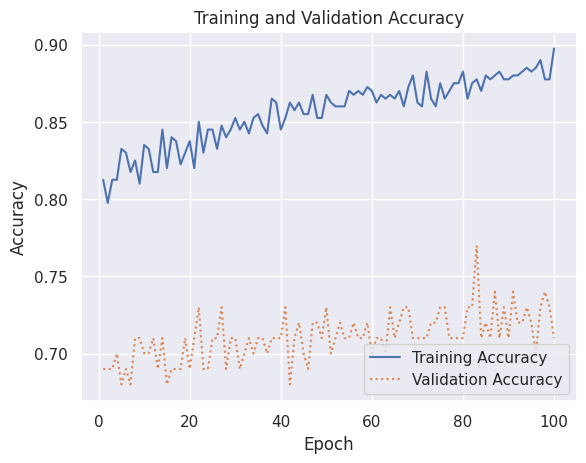

In [ ]:
def show_history(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()
    
show_history(hist)

In all likelihood, the training accuracy approached 100% in later epochs, while the validation accuracy peaked out around 80%. Let's try reducing the hidden layer to 128 neurons.

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=60)

Epoch 1/100
7/7 [==============================] - 1s 43ms/step - loss: 1.6106 - accuracy: 0.2100 - val_loss: 1.6080 - val_accuracy: 0.2000
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 1.6084 - accuracy: 0.2000 - val_loss: 1.6075 - val_accuracy: 0.2000
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 1.6071 - accuracy: 0.2000 - val_loss: 1.6065 - val_accuracy: 0.2000
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 1.6056 - accuracy: 0.2125 - val_loss: 1.6054 - val_accuracy: 0.2000
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 1.6045 - accuracy: 0.2125 - val_loss: 1.6044 - val_accuracy: 0.2000
Epoch 6/100
7/7 [==============================] - 0s 19ms/step - loss: 1.6034 - accuracy: 0.2000 - val_loss: 1.6033 - val_accuracy: 0.2000
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 1.6018 - accuracy: 0.2000 - val_loss: 1.6021 - val_accuracy: 0.2000
Epoch 8/100
7/7 [===

Once more, plot the accuracy over time to assess how well the network learned.

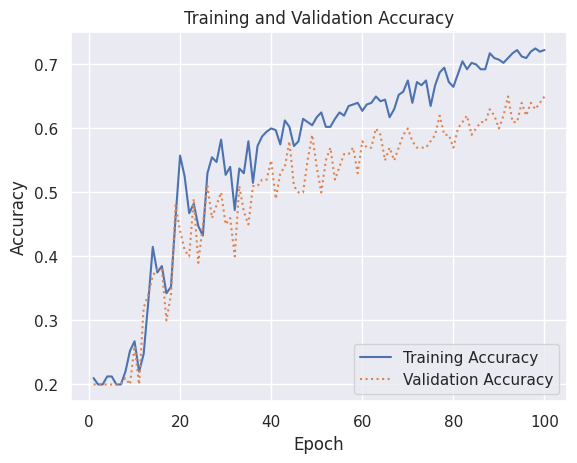

In [ ]:
show_history(hist)

Most likely, the validation accuracy was about the same with 128 neurons in the hidden layer as it was with 512. Use the test data to generate a confusion matrix to visualize how well the network is able to recognize faces.

4/4 [==============================] - 0s 7ms/step


Text(109.44999999999996, 0.5, 'Actual label')

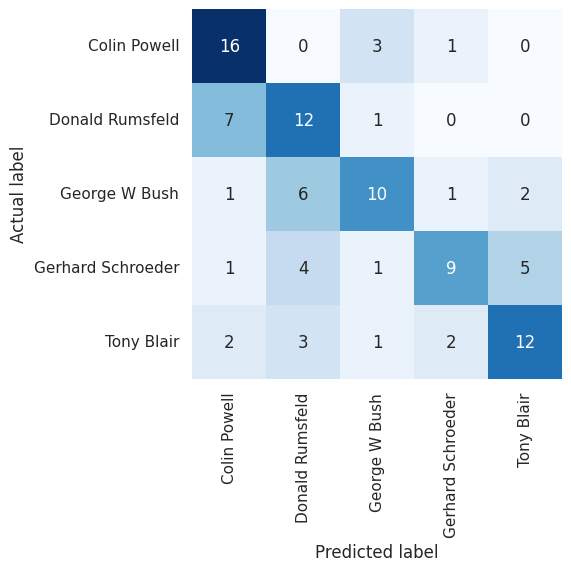

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

How many times did the model correctly identify George W. Bush? How many times did it identify him as someone else?